In [42]:
import numpy as np
import pandas as pd
import pgaccess as pg

from sklearn.model_selection import train_test_split

In [2]:
data = pg.get_test_data(300000)
data

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,target
0,2018-04-18,DL,DL,DL,1739,DL,N860DN,1739,10397,ATL,...,15376,TUS,"Tucson, AZ",2013,2120,N,247.0,1.0,1541.0,-16.0
1,2018-04-18,DL,DL,DL,1806,DL,N948AT,1806,14747,SEA,...,14679,SAN,"San Diego, CA",1135,1423,N,168.0,1.0,1050.0,-8.0
2,2018-04-18,DL,DL,DL,1854,DL,N925DN,1854,11433,DTW,...,11292,DEN,"Denver, CO",1602,1719,N,197.0,1.0,1123.0,20.0
3,2018-04-18,DL,DL,DL,1970,DL,N964DL,1970,10397,ATL,...,13495,MSY,"New Orleans, LA",750,826,N,96.0,1.0,425.0,-15.0
4,2018-04-18,DL,DL,DL,1971,DL,N960DL,1971,10397,ATL,...,10994,CHS,"Charleston, SC",1704,1815,N,71.0,1.0,259.0,-7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294894,2018-04-18,DL,DL,DL,1504,DL,N946AT,1504,12448,JAN,...,10397,ATL,"Atlanta, GA",1151,1420,N,89.0,1.0,341.0,-21.0
294895,2018-04-18,DL,DL,DL,1516,DL,N812DN,1516,13487,MSP,...,14107,PHX,"Phoenix, AZ",1754,1916,N,202.0,1.0,1276.0,14.0
294896,2018-04-18,DL,DL,DL,1566,DL,N359NW,1566,15304,TPA,...,10721,BOS,"Boston, MA",1135,1438,N,183.0,1.0,1185.0,15.0
294897,2018-04-18,DL,DL,DL,1661,DL,N907DE,1661,14100,PHL,...,10397,ATL,"Atlanta, GA",1751,2000,N,129.0,1.0,666.0,-5.0


# Convert all columns to numeric

In [35]:
modelData = data.drop(
    columns = [
        'branded_code_share', 'mkt_carrier', 'mkt_carrier_fl_num',
        'op_carrier_fl_num', 'origin_city_name', 'dest_city_name',
        'dup', 'flights', 'mkt_unique_carrier', 'origin_airport_id',
        'dest_airport_id'
    ]
)

modelData['fl_date'] = modelData.fl_date.dt.dayofyear
modelData

,fl_date,op_unique_carrier,tail_num,origin,dest,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,target
0,108,DL,N860DN,ATL,TUS,2013,2120,247.0,1541.0,-16.0
1,108,DL,N948AT,SEA,SAN,1135,1423,168.0,1050.0,-8.0
2,108,DL,N925DN,DTW,DEN,1602,1719,197.0,1123.0,20.0
3,108,DL,N964DL,ATL,MSY,750,826,96.0,425.0,-15.0
4,108,DL,N960DL,ATL,CHS,1704,1815,71.0,259.0,-7.0
...,...,...,...,...,...,...,...,...,...,...
294894,108,DL,N946AT,JAN,ATL,1151,1420,89.0,341.0,-21.0
294895,108,DL,N812DN,MSP,PHX,1754,1916,202.0,1276.0,14.0
294896,108,DL,N359NW,TPA,BOS,1135,1438,183.0,1185.0,15.0
294897,108,DL,N907DE,PHL,ATL,1751,2000,129.0,666.0,-5.0


In [39]:
catCols = ['op_unique_carrier', 'tail_num', 'origin', 'dest']
catData = modelData[catCols].copy()
catData

,op_unique_carrier,tail_num,origin,dest
0,DL,N860DN,ATL,TUS
1,DL,N948AT,SEA,SAN
2,DL,N925DN,DTW,DEN
3,DL,N964DL,ATL,MSY
4,DL,N960DL,ATL,CHS
...,...,...,...,...
294894,DL,N946AT,JAN,ATL
294895,DL,N812DN,MSP,PHX
294896,DL,N359NW,TPA,BOS
294897,DL,N907DE,PHL,ATL


In [40]:
from category_encoders.binary import BinaryEncoder

cebin = BinaryEncoder(drop_invariant=True)
bins = cebin.fit_transform(catData)
bins

E:\Users\eboyc\anaconda3\envs\bootcamp\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
E:\Users\eboyc\anaconda3\envs\bootcamp\lib\site-packages\category_encoders\basen.py:236: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_out.drop(col, 1, inplace=True)


,op_unique_carrier_1,op_unique_carrier_2,op_unique_carrier_3,op_unique_carrier_4,op_unique_carrier_5,tail_num_1,tail_num_2,tail_num_3,tail_num_4,tail_num_5,...,origin_9,dest_1,dest_2,dest_3,dest_4,dest_5,dest_6,dest_7,dest_8,dest_9
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294894,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,1,1
294895,0,0,0,0,1,0,0,0,1,1,...,1,0,0,0,0,1,1,1,1,1
294896,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
294897,0,0,0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,1,0,1,1


In [44]:
encoded = pd.merge(
    modelData.drop(columns=catCols), bins,
    left_index = True,
    right_index = True
)
encoded

,fl_date,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,target,op_unique_carrier_1,op_unique_carrier_2,op_unique_carrier_3,op_unique_carrier_4,...,origin_9,dest_1,dest_2,dest_3,dest_4,dest_5,dest_6,dest_7,dest_8,dest_9
0,108,2013,2120,247.0,1541.0,-16.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,108,1135,1423,168.0,1050.0,-8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,108,1602,1719,197.0,1123.0,20.0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
3,108,750,826,96.0,425.0,-15.0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,108,1704,1815,71.0,259.0,-7.0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294894,108,1151,1420,89.0,341.0,-21.0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,1
294895,108,1754,1916,202.0,1276.0,14.0,0,0,0,0,...,1,0,0,0,0,1,1,1,1,1
294896,108,1135,1438,183.0,1185.0,15.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
294897,108,1751,2000,129.0,666.0,-5.0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,1


In [45]:
y = encoded.target
X = encoded.drop(columns='target')

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
Xtrain.shape, Xtest.shape

((221174, 41), (73725, 41))

In [46]:
import statsmodels.api as sm

Xconst = sm.add_constant(X)
ols = sm.OLS(y, Xconst)
res = ols.fit()

res.summary()

E:\Users\eboyc\anaconda3\envs\bootcamp\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     93.13
Date:                Wed, 22 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:34:15   Log-Likelihood:            -1.5670e+06
No. Observations:              294899   AIC:                         3.134e+06
Df Residuals:                  294857   BIC:                         3.135e+06
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -6.2393      0.726     -8.592      0.000      -7.663      -4.816
fl_date                -0.0047      0.001     -5.440      0.000      -0.006      -0.003
crs_dep_time            0.0066      0.000     25.509      0.000       0.006       0.007
crs_arr_time            0.0039      0.000     15.893      0.000       0.003       0.004
crs_elapsed_time       -0.0259      0.007     -3.622      0.000      -0.040      -0.012
distance                0.0017      0.001      1.978      0.048    1.53e-05       0.003
op_unique_carrier_1    -0.0159      0.240     -0.066      0.947      -0.486       0.454
op_unique_carrier_2     3.5939      0.243     14.765      0.000       3.117       4.071
op_unique_carrier_3     2.6081      0.223     11.679      0.000       2.170       3.046
op_unique_carrier_4     0.8185      0.208      3.937      0.000       0.411       1.226
op_unique_carrier_5    -0.5695      0.222     -2.566      0.010      -1.004      -0.135
tail_num_1              0.4016      0.238      1.686      0.092      -0.065       0.868
tail_num_2              0.0778      0.208      0.374      0.708      -0.330       0.486
tail_num_3              0.2200      0.184      1.195      0.232      -0.141       0.581
tail_num_4              0.0318      0.183      0.174      0.862      -0.326       0.390
tail_num_5             -0.4396      0.183     -2.403      0.016      -0.798      -0.081
tail_num_6              0.6543      0.182      3.599      0.000       0.298       1.011
tail_num_7             -0.2831      0.182     -1.557      0.119      -0.639       0.073
tail_num_8              0.3406      0.181      1.878      0.060      -0.015       0.696
tail_num_9              0.1755      0.181      0.968      0.333      -0.180       0.531
tail_num_10            -0.2996      0.181     -1.653      0.098      -0.655       0.056
tail_num_11             0.3258      0.181      1.798      0.072      -0.029       0.681
tail_num_12            -0.0259      0.181     -0.143      0.886      -0.381       0.329
tail_num_13             0.3288      0.181      1.816      0.069      -0.026       0.684
origin_1                0.1217      0.752      0.162      0.871      -1.353       1.596
origin_2               -0.9082      0.336     -2.702      0.007      -1.567      -0.249
origin_3               -0.4043      0.222     -1.818      0.069      -0.840       0.032
origin_4               -0.2018      0.200     -1.007      0.314      -0.594       0.191
origin_5                1.3500      0.192      7.043      0.000       0.974       1.726
origin_6                0.4464      0.188      2.375      0.018       0.078       0.815
origin_7               -0.1622      0.186     -0.874      0.382      -0.526       0.201
origin_8               -0.8837      0.186     -4.756      0.000      -1.248      -0.519
ori

In [54]:
import xgboost as xgb
from sklearn.metrics import r2_score

xgreg = xgb.XGBRegressor(
    n_estimators = 15
)
xgreg.fit(Xtrain, ytrain)
pred = xgreg.predict(Xtest)

r2_score(ytest, pred)

0.02258686162863055

# PCA Selection

In [81]:
from sklearn.decomposition import PCA

pca = PCA()
pcaData = pca.fit_transform(X)

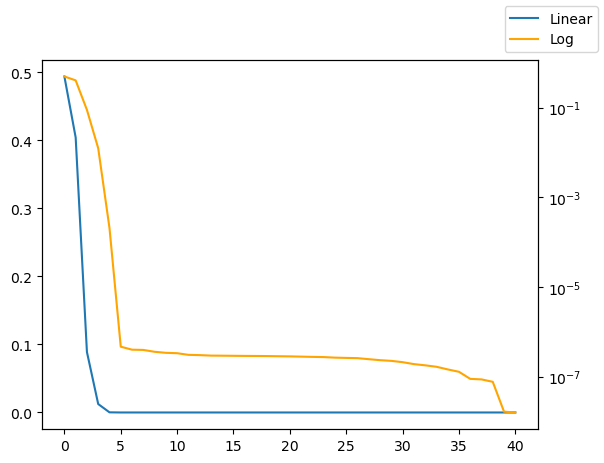

In [64]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(pca.explained_variance_ratio_, label='Linear')

ax2 = ax.twinx()
ax2.plot(pca.explained_variance_ratio_, color='orange', label='Log')
ax2.set_yscale('log')

fig.legend()
plt.show()

Even on a logarithmic scale it's still a distinct dropoff. Lets try with 5 features

In [66]:
pca = PCA(n_components=5)
pcaData = pca.fit_transform(X)

Xconst = sm.add_constant(pcaData)
ols = sm.OLS(y, Xconst)
res = ols.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     572.0
Date:                Wed, 22 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:52:42   Log-Likelihood:            -1.5675e+06
No. Observations:              294899   AIC:                         3.135e+06
Df Residuals:                  294893   BIC:                         3.135e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4049      0.091     59.629      0.000       5.227       5.583
x1            -0.0072      0.000    -51.706      0.000      -0.007      -0.007
x2            -0.0016      0.000    -10.300      0.000      -0.002      -0.001
x3             0.0024      0.000      7.251      0.000       0.002       0.003
x4             0.0046      0.001      5.255      0.000       0.003       0.006
x5             0.0041      0.007      0.605      0.545      -0.009       0.017
==============================================================================
Omnibus:                   422307.903   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        237436681.081
Skew:                           8.406   Prob(JB):                         0.00
Kurtosis:                     140.989   Cond. No.                         655.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
Xtrain, Xtest, ytrain, ytest = train_test_split(pcaData, y)
Xtrain.shape, Xtest.shape

xgreg = xgb.XGBRegressor(
    n_estimators = 15
)
xgreg.fit(Xtrain, ytrain)
pred = xgreg.predict(Xtest)

r2_score(ytest, pred)

0.016590599725508026

# Select K Best

In [77]:
from sklearn.feature_selection import\
    SelectKBest,\
    f_regression

skb = SelectKBest(f_regression, k='all')
skb.fit(X, y)
pd.DataFrame({
    'feature': X.columns,
    'score': skb.scores_
}).sort_values('score', ascending=False)

,feature,score
1,crs_dep_time,2538.502892
2,crs_arr_time,2077.661555
6,op_unique_carrier_2,332.709772
7,op_unique_carrier_3,102.128090
36,dest_5,100.476294
27,origin_5,97.758612
31,origin_9,83.224731
5,op_unique_carrier_1,70.559483
4,distance,68.836166
3,crs_elapsed_time,67.140307


In [89]:
skb.fit(pcaData, y)
pd.DataFrame({
    'score': skb.scores_
}).sort_values('score', ascending=False)

,score
0,2671.885749
6,373.043681
1,105.113713
33,87.152811
5,65.794806
36,65.744791
38,59.944252
2,52.086312
30,49.183463
31,33.327183


So it appears the highest variance PCA components aren't actually the best predictors. I believe that's what this is saying